# Cell for testing

Use this cell to test temporary code.

In [0]:
import os
from google.colab import files

#os.chdir('/content/my_drive/app/Images')
!pwd
#!ls
print(os.listdir())

'''ENSURE BELOW IS COMMENTED OUT'''


#np.save('/content/my_drive/app/X.npy', X)
#np.save('/content/my_drive/app/y.npy', y)

# Lets check the file size of MS Paint exe 
# or you can use any file path
#print(file_size('X.npy'))
#X[1,1,:]
#files.download("X.npy")
#y[data_num] = dic[image]

X.shape

# Initialize variables

In [0]:
load_saved_model = True
load_saved_dataset = True
img_size = 224

# Initialize Google Colab

First import tensorflow, check if GPU is detected.

In [3]:
# Import tensorflow

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


Then import Google Drive API to access files. Clear out output to prevent unnecessary clog (no free real estate here).

In [0]:
# Import

from IPython.display import clear_output

# https://medium.com/@burakteke/tutorial-on-using-google-colab-for-kaggle-competition-620393c22821

# This is not necessary if already downloading from online source.

# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()

# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

# Create a directory and mount Google Drive using that directory.
!mkdir -p my_drive
!google-drive-ocamlfuse my_drive

#!ls ~/my_drive

import os, os.path
os.chdir('/content/my_drive/app/DATA/Images/')

clear_output()

# Prepare the data
Read data names and scores, make dictionary with data name as key and score as value.

In [9]:
import pandas as pd
import os

os.chdir(r'/content/my_drive/app/train_test_files')

with open('DATA.txt', 'r') as myfile:
    string = myfile.read()
    
dic = dict(x.split(' ') for x in string.split('\n'))

'''
# If you wish to put the dictionary into DataFrame format:

s = pd.Series(dic, name='Image')
s.index.name = 'Score'
s.reset_index()
'''

"\n# If you wish to put the dictionary into DataFrame format:\n\ns = pd.Series(dic, name='Image')\ns.index.name = 'Score'\ns.reset_index()\n"

Define get_img for loading images. get_dataset is not used.

In [0]:
# GETTING X AND Y

import numpy as np
from os import listdir
from skimage import io
from scipy.misc import imresize
from keras.preprocessing.image import array_to_img, img_to_array, load_img

def get_img(data_path, img_size = 224):
    # Getting image array from path:
    img = io.imread(data_path)
    img = imresize(img, (img_size, img_size, 3))
    return img

def get_dataset(dataset_path='/content/my_drive/app/DATA/train_test_files/'):
    # Getting all data from data path:
    try:
        X = np.load(dataset_path + 'X.npy')
        Y = np.load(dataset_path + 'Y.npy')
    except:
        labels = listdir(dataset_path) # Geting labels
        print('Categories:\n', labels)
        len_datas = 0
        for label in labels:
            len_datas += len(listdir(dataset_path+'/'+label))
        X = np.zeros((len_datas, 64, 64, 3), dtype='float64')
        Y = np.zeros(len_datas)
        count_data = 0
        count_categori = [-1,''] # For encode labels
        for label in labels:
            datas_path = dataset_path+'/'+label
            for data in listdir(datas_path):
                img = get_img(datas_path+'/'+data)
                X[count_data] = img
                # For encode labels:
                if label != count_categori[1]:
                    count_categori[0] += 1
                    count_categori[1] = label
                Y[count_data] = count_categori[0]
                count_data += 1
        # Create dateset:
        import keras
        Y = keras.utils.to_categorical(Y)
        np.save(dataset_path + 'X.npy', X)
        np.save(dataset_path + 'Y.npy', Y)
    from sklearn.model_selection import train_test_split
    X, X_test, Y, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
    return X, X_test, Y, Y_test

#x = get_img('/content/my_drive/app/DATA/Images/ftw1.jpg')

- load_saved_arrays: Load from saved arrays?
- img_size: What should the images be resized to? (WARNING: It is heavily advised to use 224 for RetNet50)

In [0]:
# get_dataset
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img



os.chdir('/content/my_drive/app/DATA/Images/')

if load_saved_dataset:
  X = np.load('/content/my_drive/app/X.npy')
  y = np.load('/content/my_drive/app/y.npy')

else:
  dataset_len = len(dic.keys())
  X = np.zeros((dataset_len, img_size, img_size, 3), dtype='float64')
  y = np.zeros(dataset_len)
  
  for data_num, image in enumerate(os.listdir()):
    print(data_num, image)
    X[data_num] = get_img(image, img_size)
    y[data_num] = dic[image]
    #clear_output()
    print(image, '|', data_num+1, 'out of', dataset_len, '| %' + str((data_num+1) / dataset_len *100))

  X /= 255.0 # Required to divide by 255 to prevent inversion
  np.save('/content/my_drive/app/DATA/X.npy', X)
  np.save('/content/my_drive/app/DATA/y.npy', y)

#from sklearn.model_selection import train_test_split
#X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Divide color values by 255 to normalize. Show image example from X numpy array with y score.

In [0]:
import matplotlib.pyplot as plot
from skimage import data

#read image into cv2 format
#image=data.astronaut()
#x=cv2.resize(x,(224,224))

#use swapaxes to convert image to Keras' format
#image_convert=np.swapaxes(np.swapaxes(image, 1, 2), 0, 1)

def show_img(id):
  print(y[id])
  plot.imshow(X[id])
  plot.show()
  return None

show_img(5350)


# Prepare model

Example from "How to use the ResNet50 model from Keras Applications trained on ImageNet to make a prediction on an image. "

https://gist.github.com/Thimira/6dc1da782b0dca43485958dbee12a757

```
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'Data/Jellyfish.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])
```

Example from https://towardsdatascience.com/how-attractive-are-you-in-the-eyes-of-deep-neural-network-3d71c0755ccc

In [13]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from keras.applications import ResNet50

os.chdir('/content/my_drive/app/DATA/train_test_files/')

if load_saved_model:
  model = load_model('224_ACTUAL_1.h5')
else:
  resnet = ResNet50(include_top=False, pooling='avg')
  model = Sequential()
  model.add(resnet)
  model.add(Dense(1))

  model.layers[0].trainable = False

  print(model.summary())

  # Output:

94658560/94653016 [==============================] - 2s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [0]:
#load WEIGHTS

model.load_weights('224_weights.h5')

In [0]:
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())
model.save('224_ACTUAL_1.h5')


Now here is the current problem:

Runtime simply fails at this point. From what I have understood, it is due to the images not having 224x224 size as the pre-trained ResNet50.

Currently trying to resize all images to 224, however it is computationally expensive.

We must vectorize somehow.

In [0]:
if load_saved_model == False:
  model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())

  model.fit(batch_size=32, x=X, y=y, epochs=30)

  model.save('224_ACTUAL_1.h5')

Epoch 1/30


In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None


Second training with first layer trainable. For some reason, it gets negative scores? Check for answer.

In [0]:
#model.layers[0].trainable = True

print(model.summary())

#model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam())

model.fit(batch_size=32, x=X, y=y, epochs=50)

model.save('many_epochs.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________
None
Epoch 1/5
4544/5500 [=======================>......] - ETA: 31s - loss: 0.6466

5500/5500 [==============================] - 179s 33ms/step - loss: 0.5756
Epoch 2/5
5500/5500 [==============================] - 168s 31ms/step - loss: 0.1542
Epoch 3/5
5500/5500 [==============================] - 168s 31ms/step - loss: 0.0963
Epoch 4/5
2944/5500 [===============>..............] - ETA: 1:17 - loss: 0.0743

5500/5500 [==============================] - 168s 30ms/step - loss: 0.0750
Epoch 5/5
5500/5500 [==============================] - 168s 30ms/step - loss: 0.0570


# Predict

Using already available image to see if it recognizes and gives accurate result.

In [0]:
import matplotlib.pyplot as plot

os.chdir('/content/my_drive/app/DATA/Images/')

img_name = 'ftw1.jpg'

test_img = np.expand_dims(get_img(img_name), axis=0)

print(model.predict(test_img))
#print(img_name, dic[img_name])

plot.imshow(get_img(img_name))

plot.show()


In [24]:
!python -c "import tensorflow.contrib.slim as slim; eval = slim.evaluation.evaluate_once"

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [0]:
!git clone https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Counting objects: 15572, done.


(224, 224, 3)


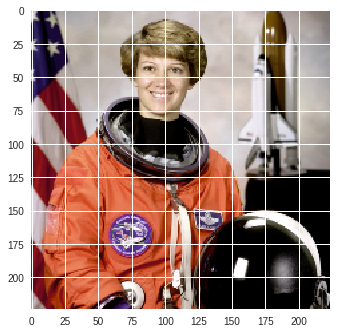

array([215, 219, 205, 174, 127,  71,  39,  15,   3,  19,  48,  51,  58,
        80, 119, 145, 147, 127,  98, 114, 157, 168, 170, 172, 174, 171,
       171, 174, 172, 175, 176, 173, 173, 173, 176, 173, 172, 175, 173,
       174, 172, 176, 180, 176, 178, 176, 175, 170, 171, 168, 166, 163,
       166, 165, 162, 163, 166, 163, 164, 172, 177, 177, 183, 183, 181,
       183, 175, 184, 177, 182, 184, 188, 191, 195, 191, 190, 192, 192,
       190, 190, 191, 188, 193, 191, 188, 186, 187, 180, 183, 183, 185,
       183, 184, 180, 182, 186, 179, 183, 182, 182, 182, 191, 188, 198,
       197, 202, 203, 207, 204, 202, 204, 205, 202, 206, 203, 202, 201,
       198, 197, 198, 198, 194, 190, 193, 190, 192, 189, 185, 185, 183,
       182, 186, 186, 188, 190, 186, 187, 187, 187, 193, 192, 189, 190,
       186, 192, 187, 188, 183, 185, 184, 186, 198, 200, 199, 204, 208,
       208, 209, 209, 206, 204, 202, 196, 199, 199, 196, 196, 192, 196,
       188, 187, 186, 184, 182, 171, 113,  13,  10,   3,   1,   

In [0]:
import numpy as np
import random
import cv2
import matplotlib.pyplot as plot
from skimage import data

#read image into cv2 format
image=data.astronaut()
image=cv2.resize(image,(224,224))

#use swapaxes to convert image to Keras' format
#image_convert=np.swapaxes(np.swapaxes(image, 1, 2), 0, 1)

#Show that it worked
print(image.shape)
plot.imshow(image)#[1,:,:])
plot.show()

image[5,:,2]

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('ftw1.jpg')
x = img_to_array(img)

import numpy as np
import random
import cv2
import matplotlib.pyplot as plot
from skimage import data

#read image into cv2 format
#image=data.astronaut()
#x=cv2.resize(x,(224,224))

#use swapaxes to convert image to Keras' format
#image_convert=np.swapaxes(np.swapaxes(image, 1, 2), 0, 1)

#Show that it worked
print(x.shape)
plot.imshow(x / 255)#[1,:,:]) # Required to divide by 255 to prevent inversion
plot.show()

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('ftw1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='', save_format='jpg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
        


In [0]:
from PIL import Image
x = Image.open('ftw1.jpg')

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

x = img_to_array(x)

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# Execution end notifier

With Rick's beautiful catchphrase as the notifier.

In [0]:
# Program end notifier audio (when you're waiting for the training
# in the background~~~ ;)

## Import up sound alert dependencies
from IPython.display import Audio, display, clear_output
import time

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above

allDone()
time.sleep(3)
clear_output()